# Question 1

In [1]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Introduction%20to%20ML/customer_data.csv"


--2021-11-17 18:25:22--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Introduction%20to%20ML/customer_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20264 (20K) [text/plain]
Saving to: ‘customer_data.csv’

customer_data.csv   100%[===================>]  19.79K  --.-KB/s    in 0s      

2021-11-17 18:25:22 (98.9 MB/s) - ‘customer_data.csv’ saved [20264/20264]



In [2]:
import pandas as pd
import numpy as np

shoppers = pd.read_csv("./customer_data.csv")

In [3]:
shoppers.head()

,Adj. Age,Adj. No. Items Viewed,Adj. Spending,Adj. Time Spent
0,-8.117912,-5.985314,8.850552,0.824004
1,6.688281,-2.283440,-4.188404,-1.582015
2,-1.006275,-2.587986,2.660652,3.444617
3,-2.962520,-3.353450,3.780374,2.845310
4,2.081291,-8.343180,5.468353,-6.336195


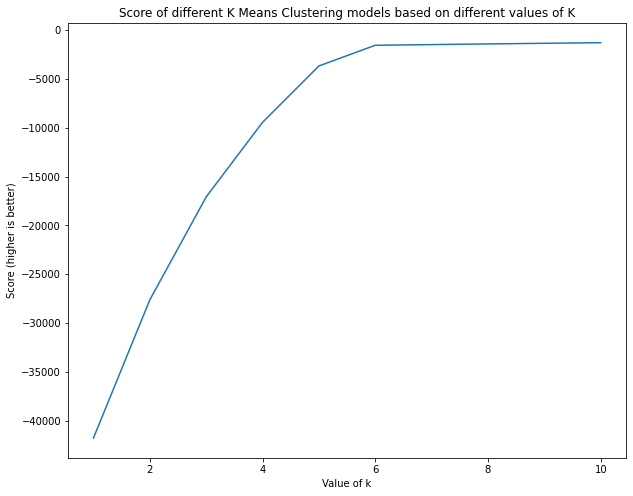

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scores = []

for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(shoppers.to_numpy())
    
    # Score the model
    scores.append(model.score(shoppers.to_numpy()))

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(list(range(1, 11)), scores)

ax.set_xlabel("Value of k")
ax.set_ylabel("Score (higher is better)")
ax.set_title("Score of different K Means Clustering models based on different values of K")

plt.show()

The elbow looks like it is at k = 6. Taking that forward, let's predict the two shoppers:

In [10]:
test_customers = [[-2.4,5.88,3.12,-5.2], [2.11,8.42,6.82,8.21]]
  
model = KMeans(n_clusters=6)
model.fit(shoppers.to_numpy())

print(model.predict(test_customers))

[5 2]


So the first customer is in cluster 5 and the second is in cluster 2.

To get the cluster centers we call the following:

In [11]:
model.cluster_centers_

array([[ 0.70654353, -6.66674883,  5.67913088, -7.95099035],
       [-9.31452627,  1.41121164, -5.01965254,  0.2947222 ],
       [ 1.72535437,  7.98126408,  7.34863783,  6.04082157],
       [ 7.23278766, -1.82223   , -3.31517322, -2.92271841],
       [-6.75848925, -5.14294944,  8.57722583,  1.03158095],
       [-2.30798969, -2.82696   ,  2.86618183,  3.45442508]])

# Question 2

In [12]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv"

--2021-11-17 18:32:44--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Numpy%2C%20Pandas%20and%20Scipy/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4351 (4.2K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.25K  --.-KB/s    in 0s      

2021-11-17 18:32:44 (51.4 MB/s) - ‘iris.csv’ saved [4351/4351]



In [60]:
import pandas as pd
import numpy as np

iris = pd.read_csv("./iris.csv", index_col=0)

In [61]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [62]:
# We know k = 3 a priori

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=3)
model.fit(iris.drop("Species", axis=1).to_numpy())

iris["Predictions"] = model.labels_

In [63]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Predictions
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [64]:
# Lots of ways to do this!

pd.crosstab(iris["Species"], iris["Predictions"])

Predictions,0,1,2
Species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


From this it should be clear that 1 = setosa, 2 = versicolor and 0 = virginica. So let's build a mapping function:

In [65]:
def mapping(species):
    if species == "setosa":
        return 1
    elif species == "versicolor":
        return 2
    else:
        return 0

iris["Mapped Species"] = iris["Species"].apply(mapping)

In [66]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Predictions,Mapped Species
1,5.1,3.5,1.4,0.2,setosa,1,1
2,4.9,3.0,1.4,0.2,setosa,1,1
3,4.7,3.2,1.3,0.2,setosa,1,1
4,4.6,3.1,1.5,0.2,setosa,1,1
5,5.0,3.6,1.4,0.2,setosa,1,1


In [67]:
# Now for metrics

from sklearn.metrics import f1_score

print("F1 score:", f1_score(iris["Mapped Species"], iris["Predictions"], average="macro"))

F1 score: 0.8917748917748917


In [69]:
# Confusion matrix (kind of did this with my crosstab solution)

from sklearn.metrics import confusion_matrix

confusion_matrix(iris["Mapped Species"], iris["Predictions"])

array([[36,  0, 14],
       [ 0, 50,  0],
       [ 2,  0, 48]])

Most errors are coming from "2"s (virginicas) being classified as "0"s (versicolors).

In [83]:
# Taking the sepal info, lots of reused code here:

model = KMeans(n_clusters=3)
model.fit(iris[["Sepal.Length", "Sepal.Width"]].to_numpy())

iris["Predictions"] = model.labels_

pd.crosstab(iris["Species"], iris["Predictions"])

Predictions,0,1,2
Species,,,
setosa,50,0,0
versicolor,0,12,38
virginica,0,35,15


In [85]:
def mapping(species):
    if species == "setosa":
        return 0
    elif species == "versicolor":
        return 2
    else:
        return 1

iris["Mapped Species"] = iris["Species"].apply(mapping)

In [86]:
print("F1 score:", f1_score(iris["Mapped Species"], iris["Predictions"], average="macro"))

F1 score: 0.8198378540686617


So accuracy goes down. Accuracy is worse.

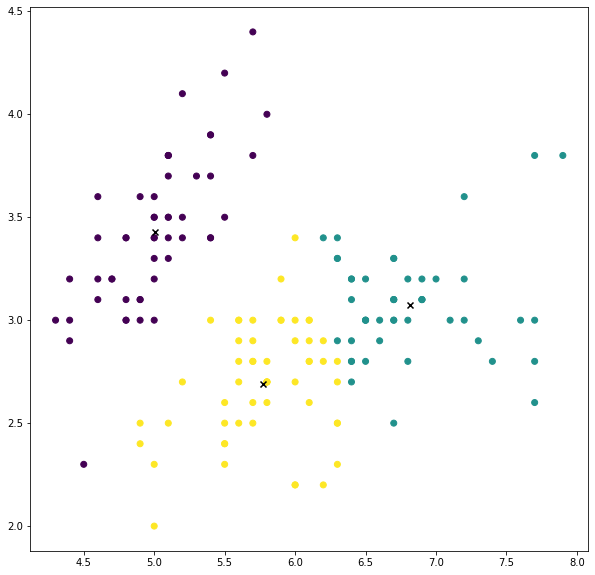

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))

centers = model.cluster_centers_

labels = model.labels_

ax.scatter(iris["Sepal.Length"], iris["Sepal.Width"], c=labels)
ax.scatter(centers[:,0],centers[:,1], marker="x", c="Black")

plt.show()

## Is there a way to find the best features to use?

We could try each pair by trial and error using a for loop.

## Is there a way to improve the model while still keeping it on a 2D plane?

We could take a combination of the features for the x and y axes (i.e "Sepal Width + Sepal Length" for x and "Petal Width + Petal Length" for y). This gives us more space to look for good combinations.


# Question 3

In [95]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

In [98]:
data, targets = load_digits(return_X_y=True)

This dataset contains 1797 images of handwritten 8x8 digits, with each point being a pixel value between 0 and 16

In [99]:
scaler = MinMaxScaler()

data = scaler.fit_transform(data)

In [100]:
data

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [101]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
model.fit(data)

KMeans(n_clusters=10)

In [125]:
# Inverse transform back to the original scaling.
centers = scaler.inverse_transform(model.cluster_centers_)

Now I have seen a problem - since the data is in flattened format we need to get it back to the 8x8 image:

In [123]:
centers.shape

(10, 8, 8)

In [124]:
centers = centers.reshape((10, 8, 8))

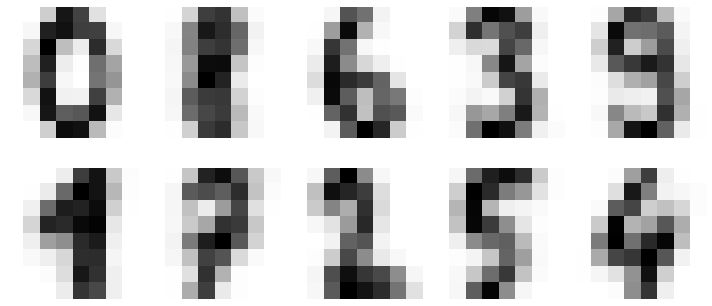

In [122]:
# This is a bit complex but all the enumerate is doing
# is giving me a way to arrange the plkots

fig, ax_list = plt.subplots(nrows=2, ncols=5, figsize=(10, 5)) 

for idx, center in enumerate(centers):

    ax = ax_list[idx // 5][idx % 5]

    # Plot the image using imshow
    ax.imshow(center, cmap="Greys")

    # Turn off the axis
    ax.axis("off")
    
plt.tight_layout()
plt.show()


So this needs some interpretation and isn't perfect. From top left to bottom right I think we have 0, 8, 6, 3, 9, 1, 7, 2, 5, 4. They kind of look like digits!